# Covid-19 Lab Notebook

(to edit this notebook and the associated python files, `git checkout` the corresponding commit by its hash, eg. `git checkout 422024d`)

In [1]:
from IPython.display import display, Markdown
from datetime import datetime
cur_datetime = datetime.now()
display(Markdown(f'# {cur_datetime.strftime("%d/%b/%Y %H:%M")}'))

# 01/Jun/2020 10:23

# Covid-19 model dynamics on SD

On this notebook, we'll explore and visualize multiple models of covid-19 behavior in a dynamic system approach. The models were written on cadCAD - a library for Complex Adaptive Dynamics simulations which allows you to mix and prototype 
different modelling paradigms in a reproducible and consistent manner.

In [1]:
%%capture
%matplotlib inline

# Dependences
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Experiments
import run

In [2]:
# Run all experiments. Typical run duration for an Core-i3 laptop is about 2-3min.
# Tweak the prey_predator_abm/sim_params.py file if you want it to take longer (or not).
start_time = time()
experiments = run.run()
end_time = time()
print("Execution in {:.1f}s".format(end_time - start_time))


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x00000245CB734148>, <cadCAD.configuration.Configuration object at 0x00000245CB739E48>]
Configurations: [<cadCAD.configuration.Configuration object at 0x00000245CB734148>, <cadCAD.configuration.Configuration object at 0x00000245CB739E48>]
Execution in 2.1s


### Covid-19 SIR model

This is the standard introductory model for Covid-19 spread. It is based on the following equations:

\begin{aligned}{\frac {d}{dt}Susceptible}&= - \beta * Infected * {\frac {Susceptible}{Total Population}}
\\{\frac{d}{dt}Infected}&=\beta * Infected * \frac {Susceptible}{Total Population} -\gamma * Infected
\\{\frac {d}{dt}Recovered}&=\gamma *Infected\end{aligned}

Where the parameters are:
- $\beta$ expected amount of people an infected person infects per day
- $\gamma$ the proportion of infected recovering per day ($\gamma$ = 1/D)



# Covid-19 SIR model mechanism 
![covid-19 SIR model mechanism](images/covid-19_sir_model.png)


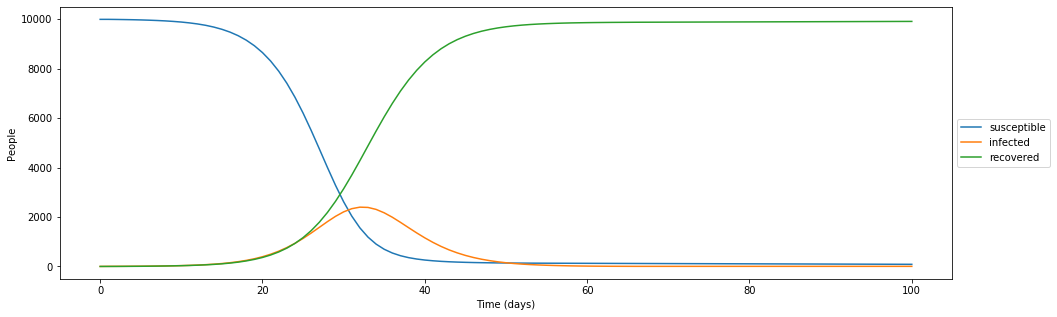

In [3]:
df = experiments.dataset[0] 
plt.rcParams["figure.figsize"]=20,5
fig, ax = plt.subplots()
ax.plot(df['timestep'], df['susceptible'], label='susceptible'  )
ax.plot(df['timestep'], df['infected'], label='infected'   )
ax.plot(df['timestep'], df['recovered'], label='recovered')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Time (days)")
ax.set_ylabel("People")
plt.show()

In [5]:
df

,susceptible,infected,recovered,run,substep,timestep
0,990.0,10.0,0.0,1,0,0
1,985.0,14.0,1.0,1,1,1
2,978.0,20.0,2.0,1,1,2
3,968.0,28.0,4.0,1,1,3
4,954.0,40.0,6.0,1,1,4
...,...,...,...,...,...,...
96,0.0,0.0,1000.0,1,1,96
97,0.0,0.0,1000.0,1,1,97
98,0.0,0.0,1000.0,1,1,98
99,0.0,0.0,1000.0,1,1,99


### Covid-19 SEIR model

This is the standard introductory model for Covid-19 spread. It is based on the following equations:

\begin{aligned}{\frac {d}{dt}Susceptible}&= - \beta * Infected * {\frac {Susceptible}{Total Population}}
\\{\frac {d}{dt}Exposed}&=\beta * Infected * {\frac {Susceptible}{Total Population}} - \delta * Exposed 
\\{\frac{d}{dt}Infected}&=\delta * Exposed - (1 - \alpha) * \gamma * Infected - \alpha* \rho* Infected
\\{\frac {d}{dt}Recovered}&=(1-\alpha)*\gamma*Infected
\\{\frac {d}{dt}Dead}&=\alpha*\rho*Infected\end{aligned}

Where the parameters are:
- $\beta$ expected amount of people an infected person infects per day
- $\gamma$ the proportion of infected recovering per day ($\gamma$ = 1/D)
- $\delta$ expected rate that exposed people turn into infected
- $\rho$ 



# Covid-19 SEIR model mechanism 
![covid-19 SIR model mechanism](images/covid-19_seir_model.png)

df = experiments.dataset[1] 
fig, ax = plt.subplots()
ax.plot(df['timestep'], df['exposed'], label='exposed')
ax.plot(df['timestep'], df['susceptible'], label='susceptible')
ax.plot(df['timestep'], df['infected'], label='infected'   )
ax.plot(df['timestep'], df['recovered'], label='recovered')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel("Time (days)")
ax.set_ylabel("People")
plt.show()

### Covid-19 SEIRD model

This is the standard introductory model for Covid-19 spread. It is based on the following equations:

\begin{aligned}{\frac {d}{dt}Susceptible}&= - \beta * Infected * {\frac {Susceptible}{Total Population}}
\\{\frac {d}{dt}Exposed}&=\beta * Infected * {\frac {Susceptible}{Total Population}} - \delta * Exposed 
\\{\frac{d}{dt}Infected}&=\delta * Exposed - (1 - \alpha) * \gamma * Infected - \alpha * \rho * Infected
\\{\frac {d}{dt}Recovered}&= (1 - \alpha) * \gamma *Infected
\\{\frac {d}{dt}Dead}&=\alpha * \rho * Infected\end{aligned}

Where the parameters are:
- $\beta$ expected amount of people an infected person infects per day
- $\gamma$ the proportion of infected recovering per day ($\gamma$ = 1 / D)
- $\delta$ expected rate that exposed people turn into infected
- $\rho$ rate at wich infected people die per day ($\rho$ = 1 / D)
- $\alpha$ death probability
- $R₀$: the total number of people an infected person infects (R₀ = β / γ)


# Covid-19 SEIRD model mechanism 
![covid-19 SEIRD model mechanism](images/covid-19_seird_model.png)

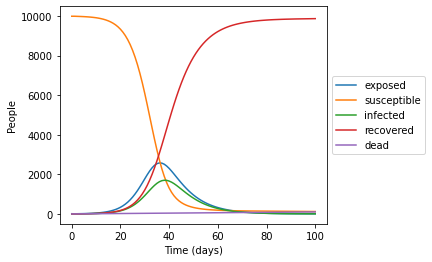

In [9]:
df = experiments.dataset[2] 
fig, ax = plt.subplots()
ax.plot(df['timestep'], df['exposed'], label='exposed')
ax.plot(df['timestep'], df['susceptible'], label='susceptible')
ax.plot(df['timestep'], df['infected'], label='infected'   )
ax.plot(df['timestep'], df['recovered'], label='recovered')
ax.plot(df['timestep'], df['dead'], label='dead')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel("Time (days)")
ax.set_ylabel("People")
plt.show()

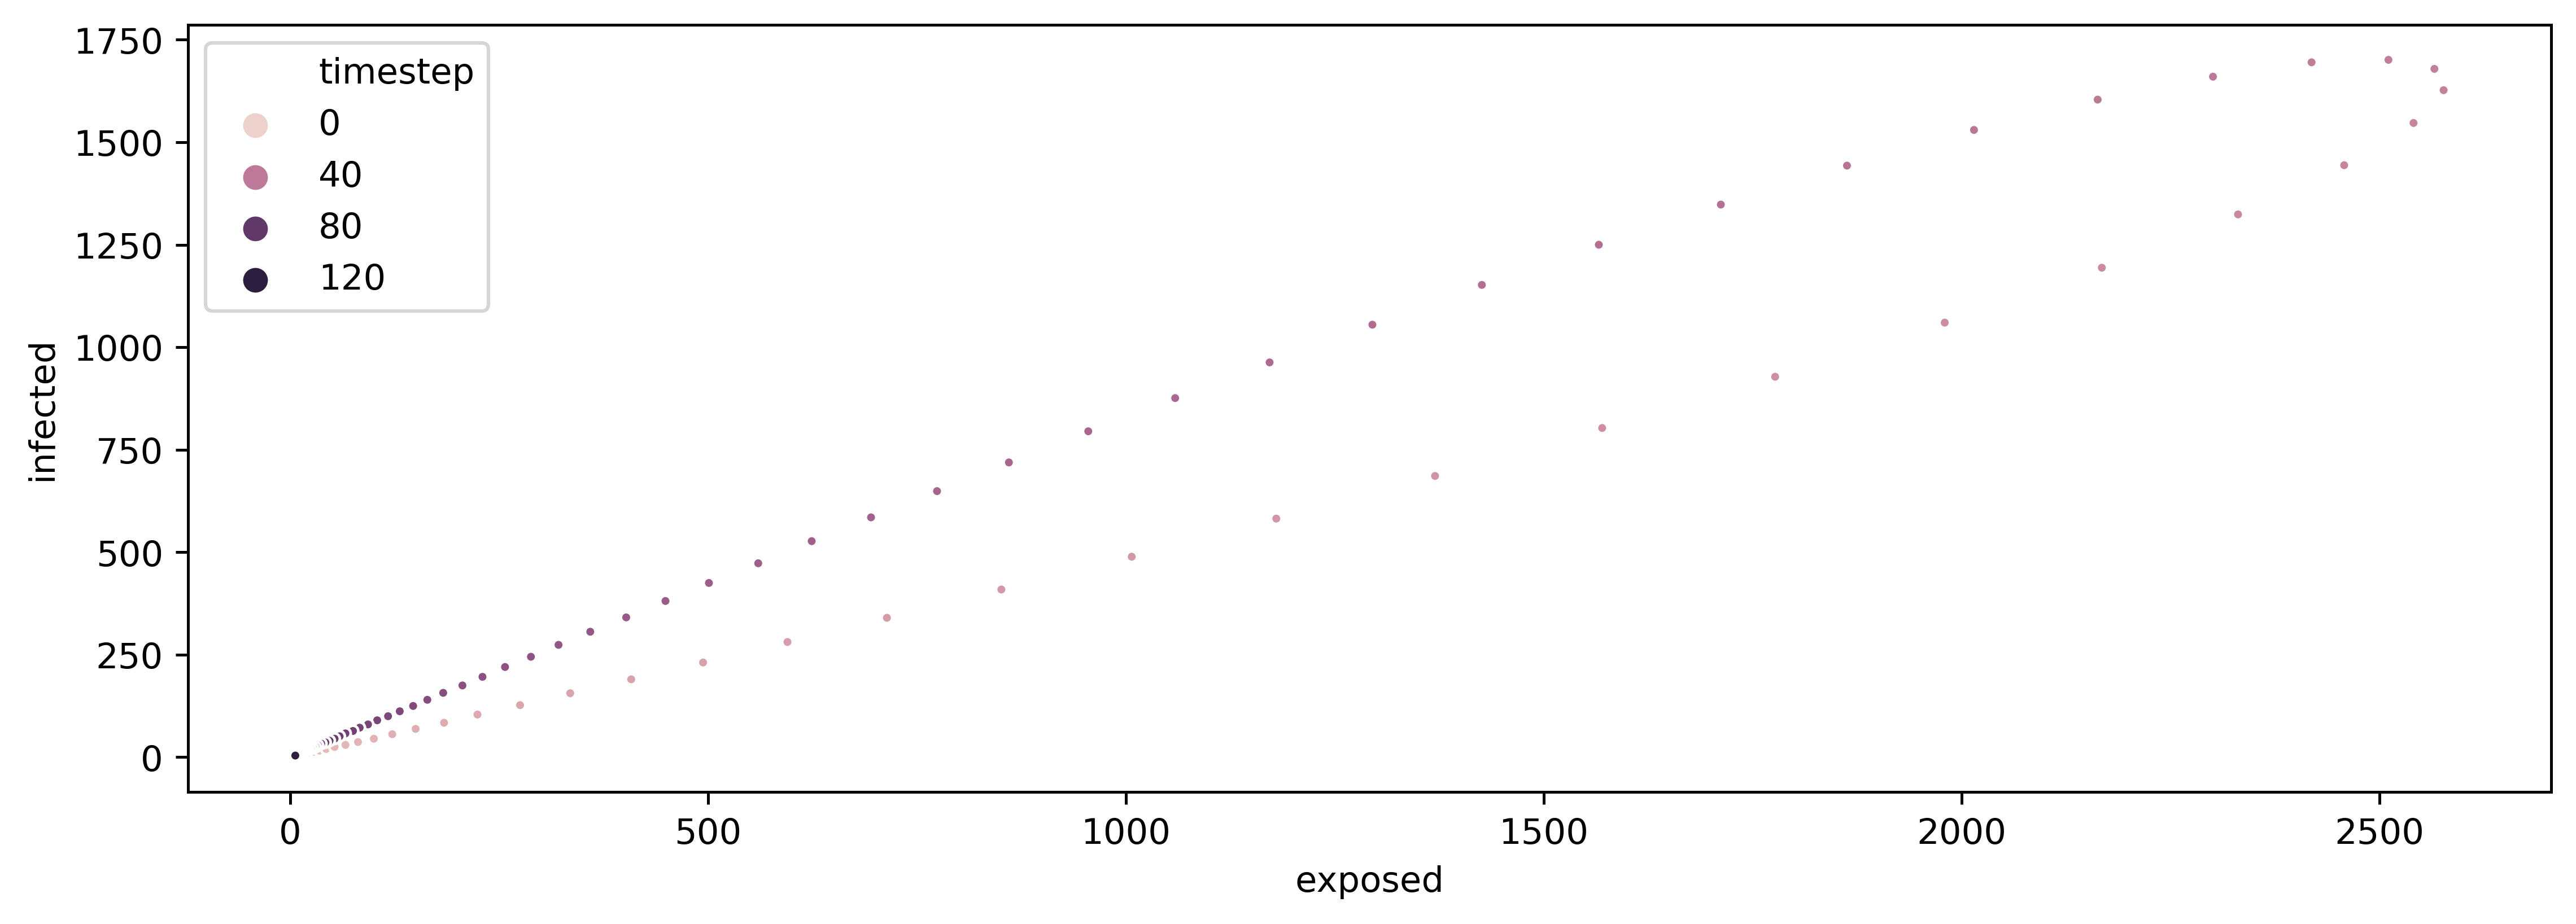

In [10]:
plt.figure(figsize=(12, 4), dpi=450)
sns.scatterplot(data=experiments.dataset[2],
                x='exposed',
                y='infected',
                hue='timestep',
                marker='.')
plt.show()

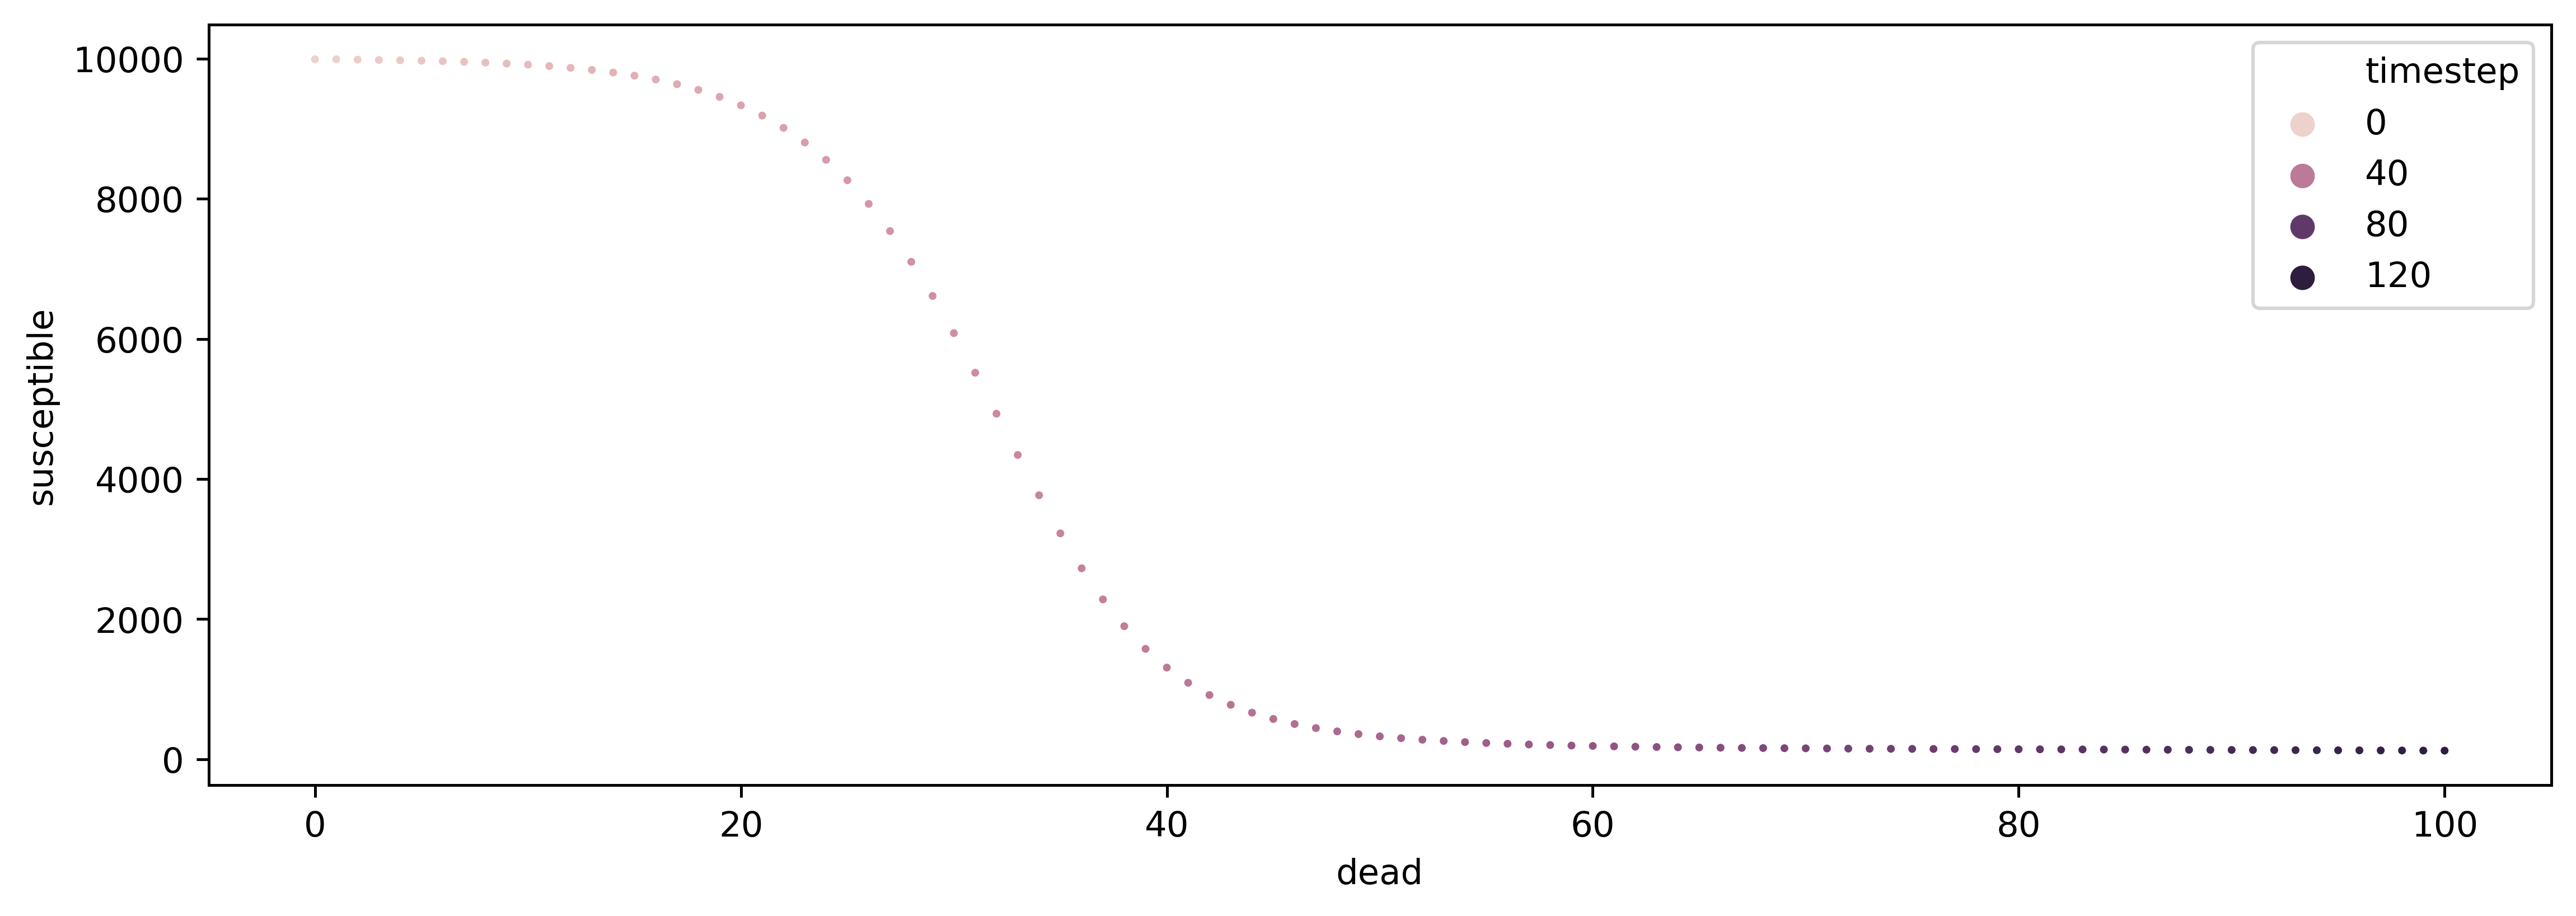

In [22]:
plt.figure(figsize=(12, 4), dpi=450)
sns.scatterplot(data=experiments.dataset[2],
                x='dead',
                y='susceptible',
                hue='timestep',
                marker='.')
plt.show()

### Conclusions and final words

### Proposed challenges

#### Make R₀ time dependent


#### Variable death rate



#### Stochasticity of the parameters



#### Add real data



In [4]:
df = experiments.dataset[3]

In [5]:
df['total'] = df['recovered']+df['infected']

In [6]:
df[['exposed', 'infected', 'recovered', 'total', 'reproductive_number', 'timestep']].head(20)

,exposed,infected,recovered,total,reproductive_number,timestep
0,10.0,0.0,0.0,0.0,"{'value': 3, 'r0': 0, 'K': 0, 'last_mutation':...",0
1,7.0,3.0,0.0,3.0,"{'value': 3, 'r0': 0, 'K': 0, 'last_mutation':...",1
2,13.0,5.0,1.0,6.0,"{'value': 3, 'r0': 0, 'K': 0, 'last_mutation':...",2
3,24.0,8.0,2.0,10.0,"{'value': 3, 'r0': 0, 'K': 0, 'last_mutation':...",3
4,40.0,14.0,4.0,18.0,"{'value': 0.650629106062583, 'r0': 4.879718295...",4
5,38.0,24.0,6.0,30.0,"{'value': 0.650629106062583, 'r0': 4.879718295...",5
6,42.0,32.0,10.0,42.0,"{'value': 1.045405346370698, 'r0': 7.840540097...",6
7,63.0,40.0,15.0,55.0,"{'value': 1.045405346370698, 'r0': 7.840540097...",7
8,86.0,53.0,21.0,74.0,"{'value': 1.045405346370698, 'r0': 7.840540097...",8
9,115.0,71.0,29.0,100.0,"{'value': 0.650629106062583, 'r0': 4.879718295...",9


In [7]:
df['reproductive_number']

0      {'value': 3, 'r0': 0, 'K': 0, 'last_mutation':...
1      {'value': 3, 'r0': 0, 'K': 0, 'last_mutation':...
2      {'value': 3, 'r0': 0, 'K': 0, 'last_mutation':...
3      {'value': 3, 'r0': 0, 'K': 0, 'last_mutation':...
4      {'value': 0.650629106062583, 'r0': 4.879718295...
                             ...                        
96     {'value': 0.22862518802977314, 'r0': 1.7146889...
97     {'value': 0.22862518802977314, 'r0': 1.7146889...
98     {'value': 0.22862518802977314, 'r0': 1.7146889...
99     {'value': 0.22862518802977314, 'r0': 1.7146889...
100    {'value': 0.22862518802977314, 'r0': 1.7146889...
Name: reproductive_number, Length: 101, dtype: object

In [8]:
df.head(20)

,susceptible,exposed,infected,recovered,reproductive_number,run,substep,timestep,total
0,9990.0,10.0,0.0,0.0,"{'value': 3, 'r0': 0, 'K': 0, 'last_mutation':...",1,0,0,0.0
1,9990.0,7.0,3.0,0.0,"{'value': 3, 'r0': 0, 'K': 0, 'last_mutation':...",1,1,1,3.0
2,9981.0,13.0,5.0,1.0,"{'value': 3, 'r0': 0, 'K': 0, 'last_mutation':...",1,1,2,6.0
3,9966.0,24.0,8.0,2.0,"{'value': 3, 'r0': 0, 'K': 0, 'last_mutation':...",1,1,3,10.0
4,9942.0,40.0,14.0,4.0,"{'value': 0.650629106062583, 'r0': 4.879718295...",1,1,4,18.0
5,9932.0,38.0,24.0,6.0,"{'value': 0.650629106062583, 'r0': 4.879718295...",1,1,5,30.0
6,9916.0,42.0,32.0,10.0,"{'value': 1.045405346370698, 'r0': 7.840540097...",1,1,6,42.0
7,9882.0,63.0,40.0,15.0,"{'value': 1.045405346370698, 'r0': 7.840540097...",1,1,7,55.0
8,9840.0,86.0,53.0,21.0,"{'value': 1.045405346370698, 'r0': 7.840540097...",1,1,8,74.0
9,9785.0,115.0,71.0,29.0,"{'value': 0.650629106062583, 'r0': 4.879718295...",1,1,9,100.0


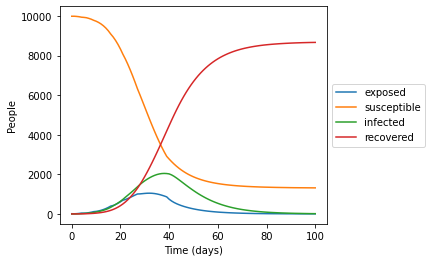

In [9]:
fig, ax = plt.subplots()
ax.plot(df['timestep'], df['exposed'], label='exposed')
ax.plot(df['timestep'], df['susceptible'], label='susceptible')
ax.plot(df['timestep'], df['infected'], label='infected'   )
ax.plot(df['timestep'], df['recovered'], label='recovered')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel("Time (days)")
ax.set_ylabel("People")
plt.show()

In [10]:
df[34:60]

,susceptible,exposed,infected,recovered,reproductive_number,run,substep,timestep,total
34,4174.0,1029.0,1947.0,2850.0,"{'value': 0.34660510171679465, 'r0': 2.5995382...",1,1,34,4797.0
35,3892.0,1008.0,1990.0,3110.0,"{'value': 0.34660510171679465, 'r0': 2.5995382...",1,1,35,5100.0
36,3623.0,980.0,2021.0,3376.0,"{'value': 0.34660510171679465, 'r0': 2.5995382...",1,1,36,5397.0
37,3369.0,945.0,2040.0,3646.0,"{'value': 0.34660510171679465, 'r0': 2.5995382...",1,1,37,5686.0
38,3130.0,906.0,2046.0,3918.0,"{'value': 0.34660510171679465, 'r0': 2.5995382...",1,1,38,5964.0
39,2908.0,861.0,2040.0,4191.0,"{'value': 0.22862518802977314, 'r0': 1.7146889...",1,1,39,6231.0
40,2772.0,743.0,2022.0,4463.0,"{'value': 0.22862518802977314, 'r0': 1.7146889...",1,1,40,6485.0
41,2643.0,653.0,1971.0,4733.0,"{'value': 0.22862518802977314, 'r0': 1.7146889...",1,1,41,6704.0
42,2523.0,580.0,1901.0,4996.0,"{'value': 0.22862518802977314, 'r0': 1.7146889...",1,1,42,6897.0
43,2413.0,519.0,1818.0,5250.0,"{'value': 0.22862518802977314, 'r0': 1.7146889...",1,1,43,7068.0
